# EMEPy Monitors

This notebook demonstrates how to use monitors in EMEPy to visualize field propagation. 

In [1]:
# from emepy.ann import ANN, MSNeuralNetwork
from emepy.fd import MSEMpy
from emepy.eme import Layer, EME
import numpy as np
from matplotlib import pyplot as plt

num_periods = 3  # Number of Periods for Bragg Grating
length = .159e-6 # Length of each segment of BG, Period = Length * 2
wavelength = 1.55e-6 # Wavelength
num_modes = 1  # Number of Modes
mesh = 128 # Number of mesh points
width1 = 0.46e-6 # Width of first core block
width2 = 0.54e-6 # Width of second core block 
thickness = 0.22e-6 # Thicnkess of the core
modesolver = MSEMpy # Which modesolver to use

eme = EME(num_periods=num_periods)
# ann = ANN()

mode_solver1 = modesolver(
    # ann,
    wavelength,
    width1,
    thickness,
)  # First half of bragg grating

mode_solver2 = modesolver(
    # ann,
    wavelength,
    width2,
    thickness,
)  # Second half of bragg grating

eme.add_layer(Layer(mode_solver1, num_modes, wavelength, length))  # First half of bragg grating
eme.add_layer(Layer(mode_solver2, num_modes, wavelength, length))  # Second half of bragg grating

## 2D Monitors

#### XZ Plane

#### YZ Plane

#### XY Plane

#### Get Array

Users do not have to use the visualize() method to work with field data. The get_array() method allows users to work with the arrays of data themselves. The arguments are the same as for visualize() and it returns a list of each axis grid i.e. (x,z) and the field data. 

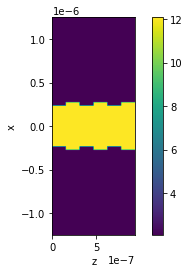

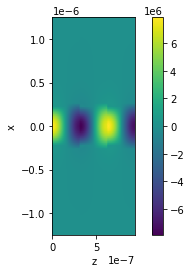

In [2]:
eme.reset(full_reset=False)

monitor = eme.add_monitor(axes="xz")

eme.propagate()  # propagate at given wavelength
x, z, index = monitor.get_array(component="n", axes="xz")
x, z, field = monitor.get_array(component="Hy", axes="xz")

plt.figure()
plt.imshow(np.real(index), extent=[z[0], z[-1], x[0], x[-1]])
plt.xlabel('z')
plt.ylabel('x')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(np.real(field), extent=[z[0], z[-1], x[0], x[-1]])
plt.xlabel('z')
plt.ylabel('x')
plt.colorbar()
plt.show()

#### Custom Z Range

Users can specify where in z they care to visualize fields. By specifying in add_monitor() before propagation, users can limit how much field data is stored and thus how much memory is consumed. By specifying after propagation in visualize(), users can visualize a subset of the data that is stored. 

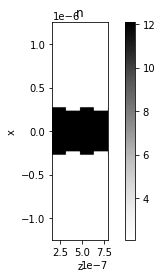

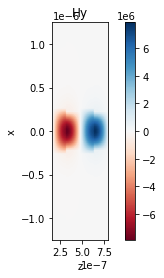

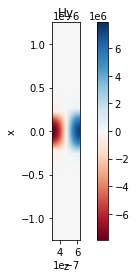

In [3]:
eme.reset(full_reset=False)

monitor = eme.add_monitor(axes="xz", z_range=(1*0.159e-6, 5*0.159e-6))

eme.propagate()  # propagate at given wavelength

plt.figure()
monitor.visualize(component="n", axes="xz")
plt.colorbar()
plt.show()

plt.figure()
monitor.visualize(component="Hy", axes="xz")
plt.colorbar()
plt.show()

# Smaller subset of fields stored
plt.figure()
monitor.visualize(component="Hy", axes="xz", z_range=(2*0.159e-6, 4*0.159e-6))
plt.colorbar()
plt.show()

#### Custom XY Mesh Grid

## 3D Monitors

If a 3D monitor is chosen ("xyz") more field data is stored requiring more memory. However, this lets users visualize any cross section in the entire simulation (or specified) domain or extract the entire 3D field as an array. 